In [1]:
# импорт необходимых библиотек # import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.1. Парсинг данных

In [2]:
# Загрузка данных из репозитория # Loading data from the repository 
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Приведение типов # Type conversion
df['date']=pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187801 entries, 0 to 187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    187801 non-null  object        
 1   continent                                   176870 non-null  object        
 2   location                                    187801 non-null  object        
 3   date                                        187801 non-null  datetime64[ns]
 4   total_cases                                 180399 non-null  float64       
 5   new_cases                                   180190 non-null  float64       
 6   new_cases_smoothed                          179016 non-null  float64       
 7   total_deaths                                162023 non-null  float64       
 8   new_deaths                                  162021 non-null  float64      

##### Просмотр количества пустых значений

In [6]:
pd.set_option('display.max_rows',10)

In [7]:
df.shape

(187801, 67)

Все данные при парсинге из репозитория были включены. Размерность набора данных составляет 183348 строк и 67 столбцов

Дополним набор данных новой информацией, чтобы в случае необходимости точность модели при обучении была больше. Также новые данные могут пригодиться для того, чтобы включить их в аналих данных, из которого можно вынести некоторые зависимости, если они присутствует.

В качестве новых данных возьмём среднее количество смертей и заражённых на регион.

In [8]:
# Заполнение пустых полей # Filling in empty fields
df[['location', 'new_cases', 'new_deaths']]=df[['location', 'new_cases', 'new_deaths']].fillna(0)

In [9]:
# Формирование дополнительных атрибутов # Formation of additional attributes
grouped_cases=df[['location',  
                  'new_cases', 
                  'new_deaths']].groupby(by="location").mean().rename(columns={'new_cases':'mean_new_cases', 
                                                                               'new_deaths':'mean_new_deaths'})

In [10]:
grouped_cases

,mean_new_cases,mean_new_deaths
location,,
Afghanistan,220.104167,9.430147
Africa,14262.984281,306.457074
Albania,338.321472,4.290798
Algeria,326.185276,8.435583
Andorra,52.622991,0.191595
...,...,...
Western Sahara,0.000000,0.000000
World,615901.771496,7340.041225
Yemen,15.350649,2.790909


In [11]:
df=df.merge(grouped_cases, on='location')

In [12]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,220.104167,9.430147
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,220.104167,9.430147
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,220.104167,9.430147
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,220.104167,9.430147
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,220.104167,9.430147


##### Генерация новых данных произведена

 ## 1.2 Предобработка данных и выделение значимых атрибутов

##### Заполним все пустые значения нулями

In [13]:
df=df.fillna(0)

### Определение наиболее значимых атрибутов

###### Чтобы найти наиболее значимые атрибуты, построим корреляцию Пирсона на тепловой карте

Text(0.5, 1.0, 'Correlation Heatmap')

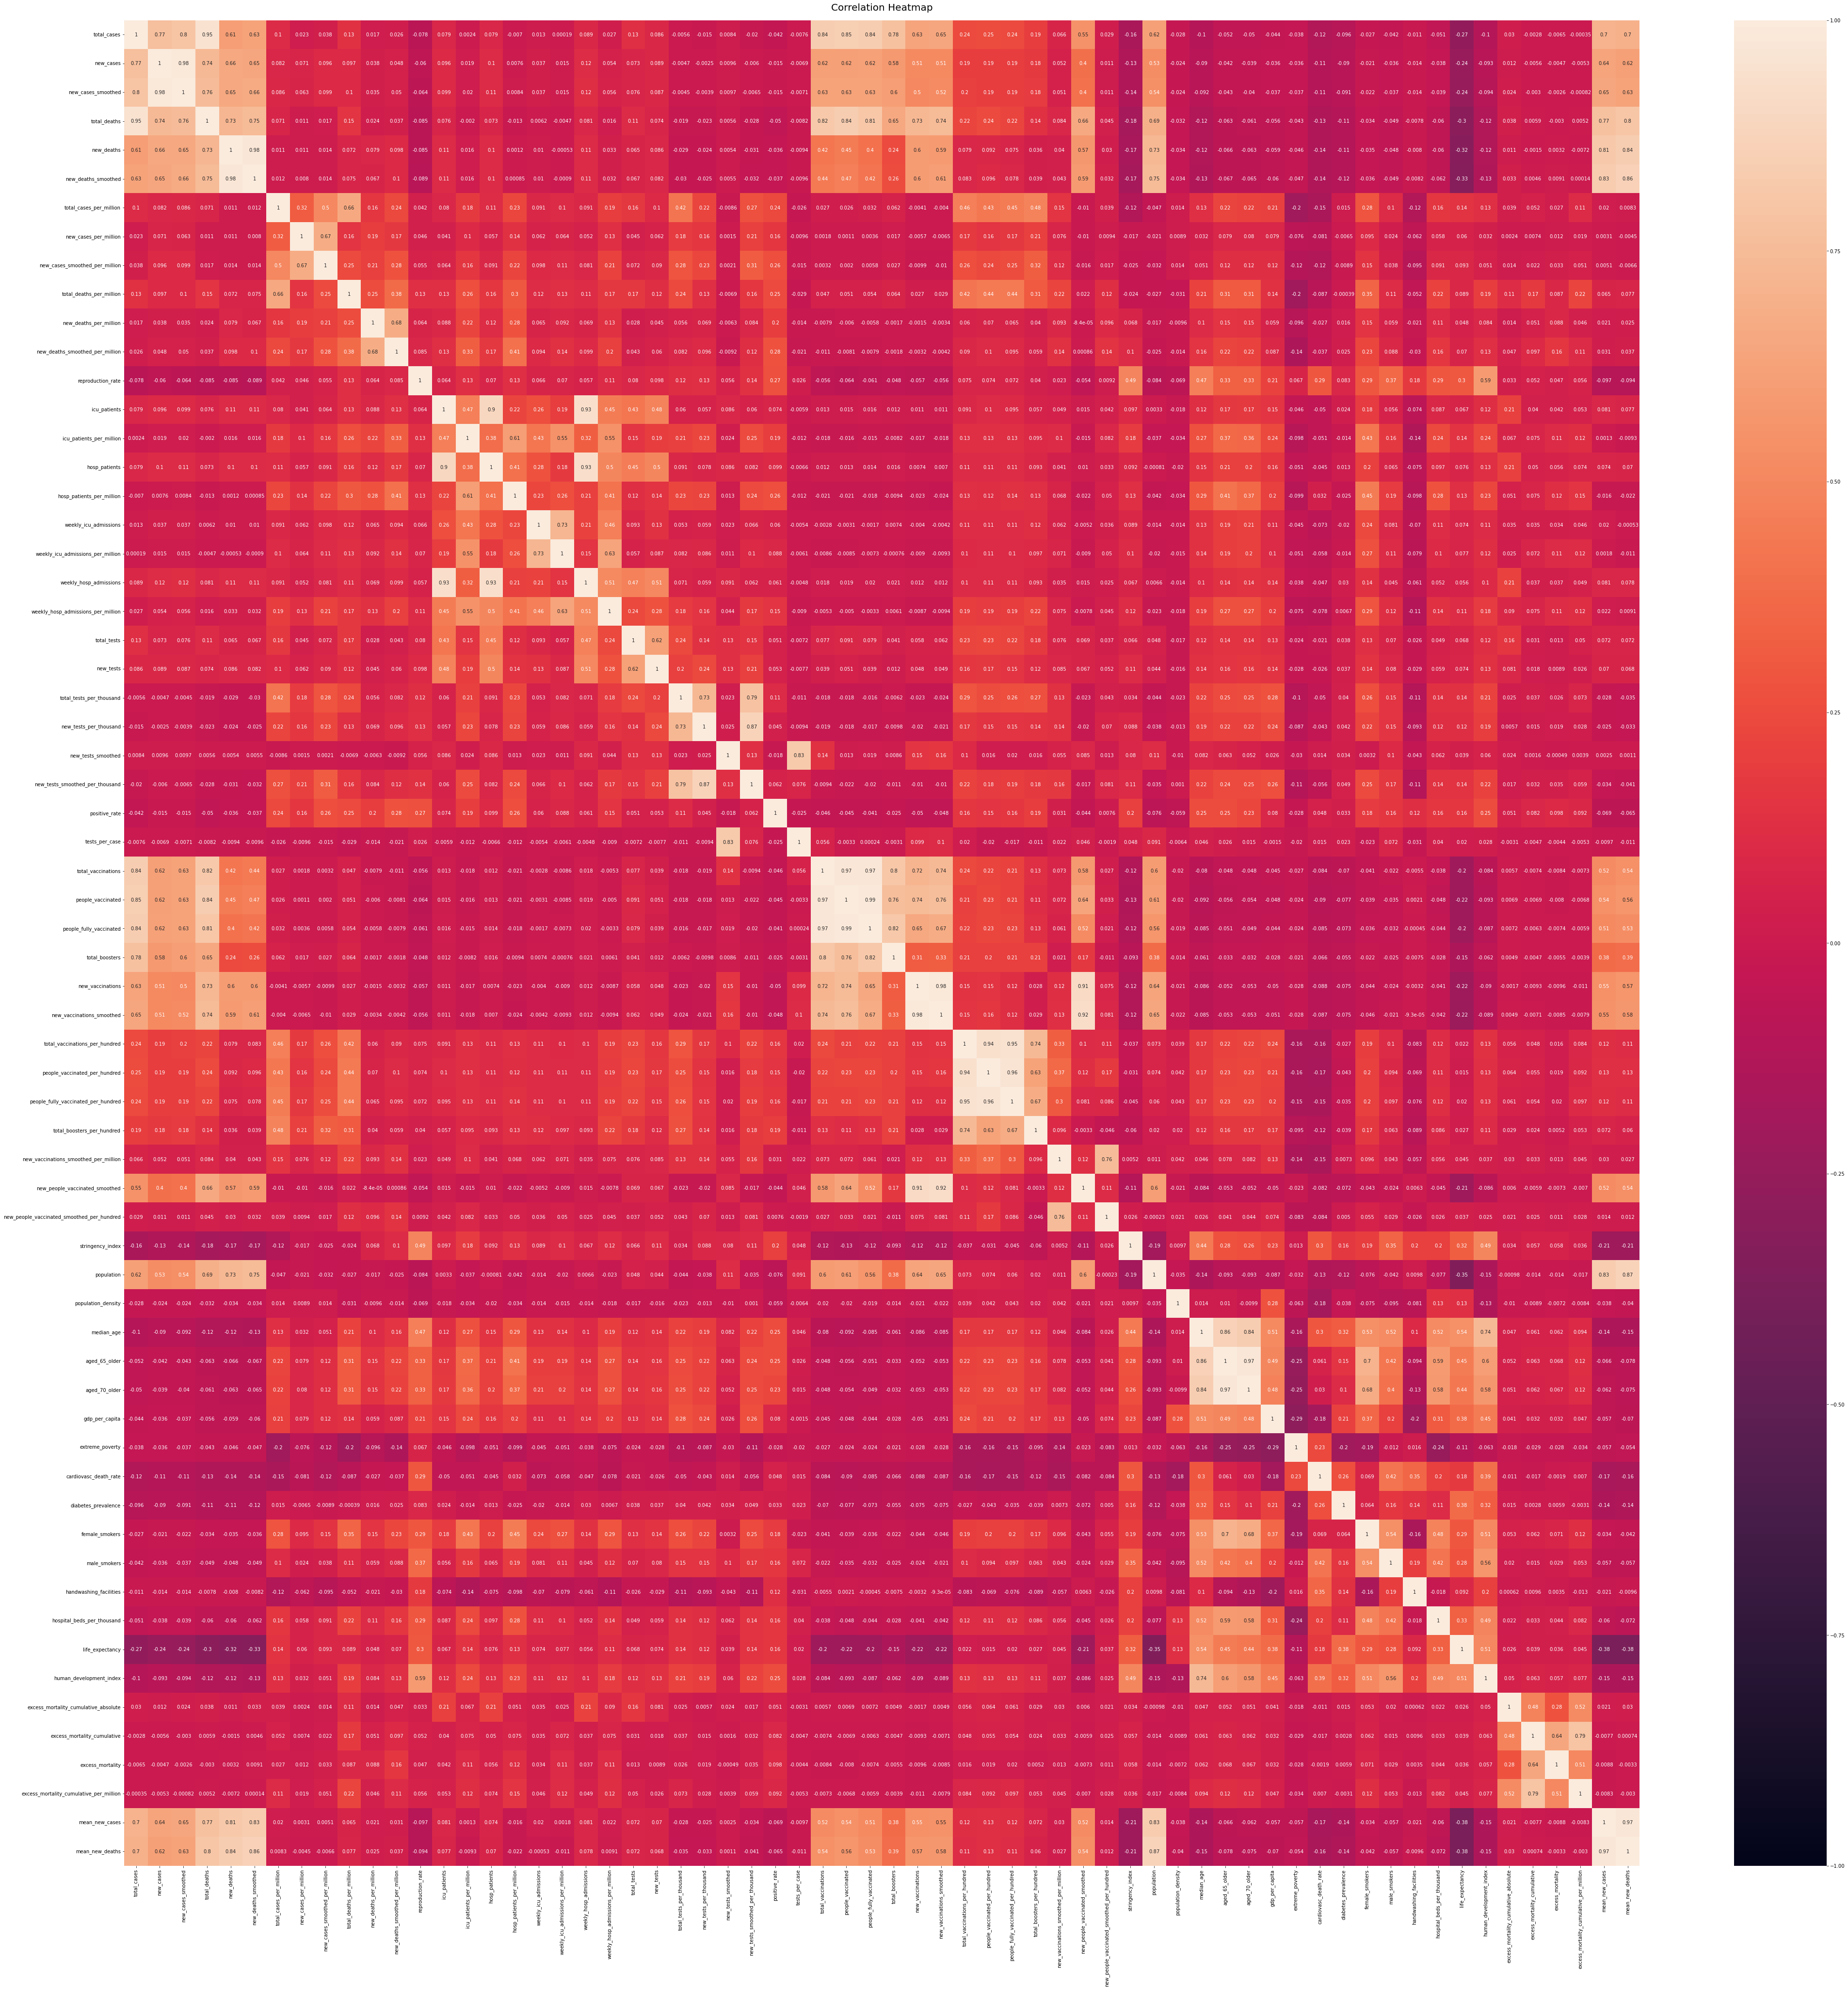

In [14]:
# Фомирование корреляции Пирсона # Pearson correlation formation
corr=df.corr()
plt.figure(figsize=(70, 70))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)

Как видим выше, достаточно много признаков имеют высокий коэффициент корреляции, но наиболее значимыми атрибутами являются: 
total_casem, new_case, new_cases_smoothed, total_deaths, new_deaths и new_deaths_smoothed

## 1.3. Описание структуры набора данных

In [16]:
# Описание каждого атрибута # Description of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187801 entries, 0 to 187800
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    187801 non-null  object        
 1   continent                                   187801 non-null  object        
 2   location                                    187801 non-null  object        
 3   date                                        187801 non-null  datetime64[ns]
 4   total_cases                                 187801 non-null  float64       
 5   new_cases                                   187801 non-null  float64       
 6   new_cases_smoothed                          187801 non-null  float64       
 7   total_deaths                                187801 non-null  float64       
 8   new_deaths                                  187801 non-null  float64      

###### описание всех атрибутов.........................................

### Пустые значения

Пустые значения были предобработанны ранее, после предобработки их больше не осталось

In [17]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million               

In [18]:
pd.set_option('display.max_rows',10)

### Плотность распределения данных

Сформируем графики плотностей для каждого признака

In [19]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,mean_new_cases,mean_new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,220.104167,9.430147
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,220.104167,9.430147
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,220.104167,9.430147
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,220.104167,9.430147
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,220.104167,9.430147


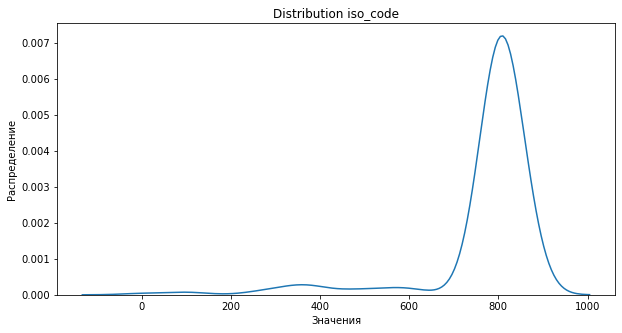

In [20]:
# Распределение категориальной переменной # Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(df['iso_code'].value_counts())
plt.title('Distribution iso_code')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

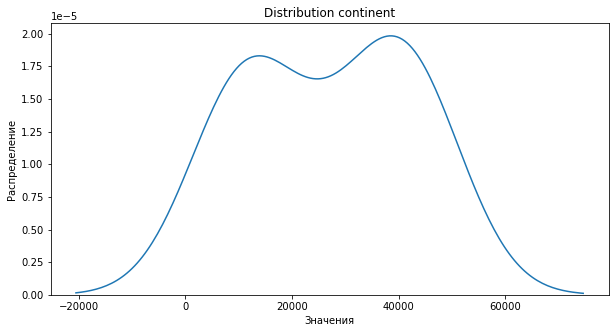

In [21]:
# Распределение категориальной переменной # Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(df['continent'].value_counts())
plt.title('Distribution continent')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

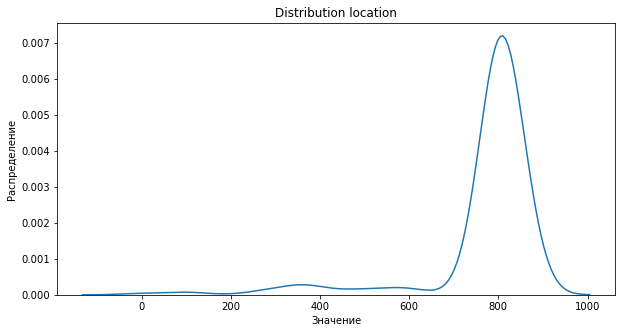

In [22]:
# Распределение категориальной переменной # Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(df['location'].value_counts())
plt.title('Distribution location')
plt.xlabel('Значение')
plt.ylabel('Распределение')
plt.show()

In [23]:
#Функция вывода распределения каждого атрибута, являющегося численным признаком #Output function of the distribution of each attribute, which is a numerical feature
def plot(column):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column])
    plt.title('Distribution '+column)
    plt.xlabel('Значения')
    plt.ylabel('Распределение')
    plt.show()

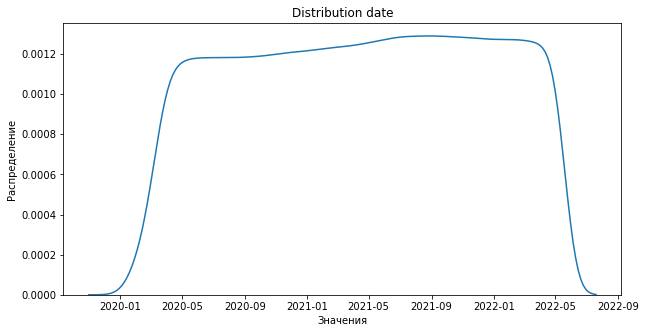

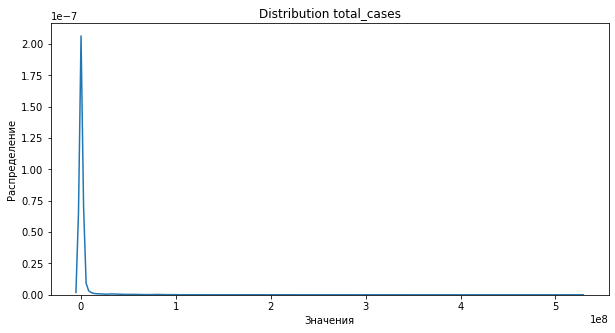

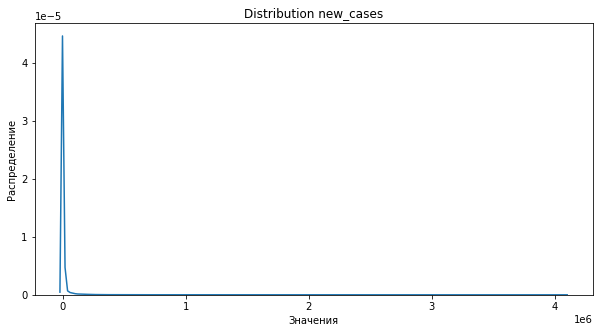

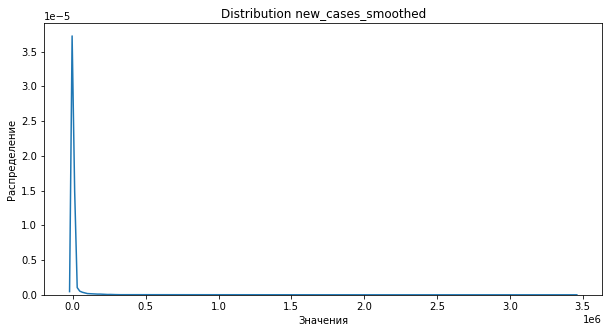

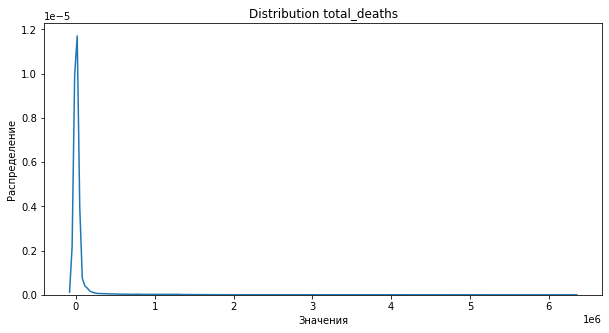

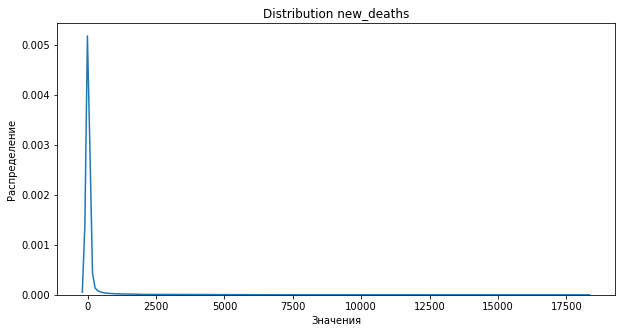

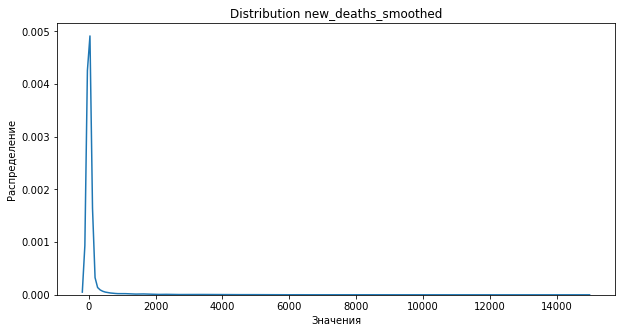

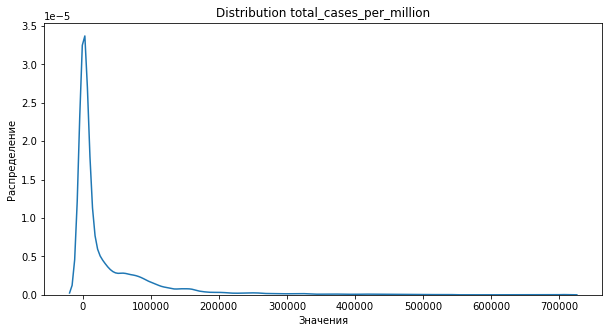

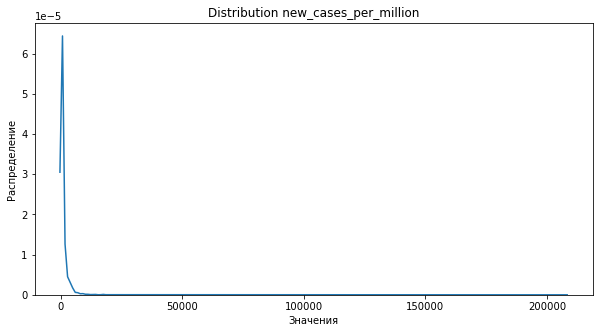

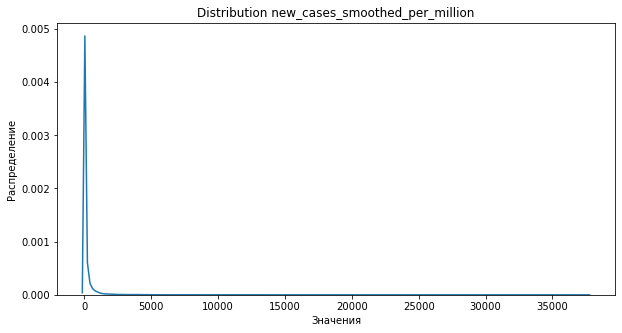

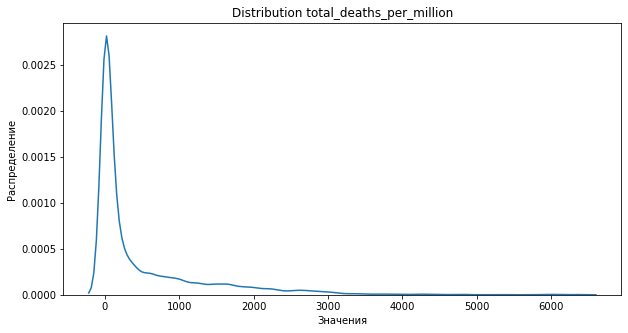

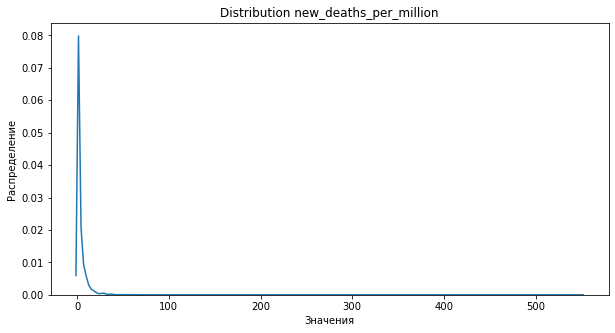

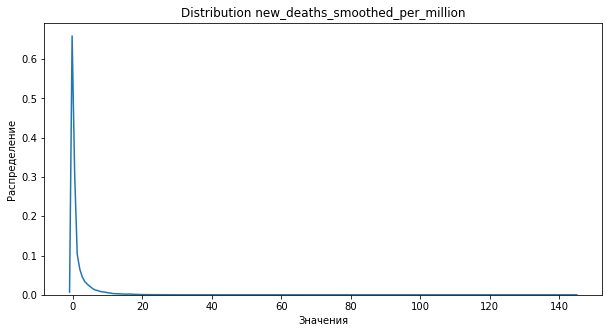

In [ ]:
#Применение функции #Function Application
for column in df[:100].select_dtypes(exclude=['object']).columns:
    plot(column)

In [ ]:
df.head()

In [ ]:
# Распределение категориальной переменной # Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(df['iso_code'].value_counts())
plt.title('Distribution iso_code')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Распределение категориальной переменной # Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(df['continent'].value_counts())
plt.title('Distribution continent')
plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.show()

In [ ]:
# Распределение категориальной переменной # Categorical variable distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(df['location'].value_counts())
plt.title('Distribution location')
plt.xlabel('Значение')
plt.ylabel('Распределение')
plt.show()

In [ ]:
#Функция вывода распределения каждого атрибута, являющегося численным признаком #Output function of the distribution of each attribute, which is a numerical feature
def plot(column):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column])
    plt.title('Distribution '+column)
    plt.xlabel('Значения')
    plt.ylabel('Распределение')
    plt.show()

In [ ]:
#Применение функции #Function Application
for column in df[:100].select_dtypes(exclude=['object']).columns:
    plot(column)

## 1.4. Формирование дополнительных атрибутов
Сформируем новый атрибут согласно формуле приведённой в задании:

Rt = число зарегистрированных заболеваний за последние 4 дня / число зарегистрированных заболеваний за предыдущие 4 дня

In [ ]:
#Алгоритм вычисления нового атрибута Rt #Algorithm for calculating the new Rt attribute
df['Rt']=None
data=pd.DataFrame()
for country in df['location'].value_counts().keys():
    r=df[df['location']==country].copy()
    da=pd.DataFrame()
    for i in range(0, len(r), 8):
        tida=pd.DataFrame()
        su=r['new_cases'].tail(8).tail(4).sum()/r['new_cases'].tail(8).head(4).sum()
        tida=r.tail(8)
        tida['Rt']=su
        r.drop(r.tail(8).index,inplace=True)
        da=da.append(tida)
    data=data.append(da)

In [ ]:
data=data.fillna(0)

In [ ]:
data.reset_index(drop=True, inplace=True)
df=data

In [ ]:
df.head()

##### Результат алгоритма выше демонстрирует формирование дополнительного атрибута Rt - коэффициент распространения инфекции

## Анализ возможности определения изменения эпидемиологической

Проанализируем полученные данные для нескольких стран

In [ ]:
d=pd.DataFrame({'Russia': [list(df[df['location']=='Russia']['Rt'])[0]], 
                'Mexico':[list(df[df['location']=='Mexico']['Rt'])[0]], 
                'France': [list(df[df['location']=='France']['Rt'])[0]], 
                'Taiwan':[list(df[df['location']=='Taiwan']['Rt'])[0]], 
                'United States':[list(df[df['location']=='United States']['Rt'])[0]], 
                'Japan':[list(df[df['location']=='Japan']['Rt'])[0]], 
                'Canada':[list(df[df['location']=='Canada']['Rt'])[0]], 
                'Singapore':[list(df[df['location']=='Singapore']['Rt'])[0]],}).T

##### Выведем актуальные Rt - значения для каждой страны

In [ ]:
plt.rcParams.update({'font.size': 15,})
plt.figure(figsize=(15, 8))
plots = sns.barplot(x=d.index, y=d[0], data=df)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Анализ эпидемиологической обстановки')
plt.ylabel('Rt - значение')
plt.xlabel('Страна')
plt.show()

Из полученных результатов можно сказать, что максимальное Rt - значение предложенных стран - это Сингапур(2.27). Минимальное - Мексика (0.56). Россия на текущий день имеет Rt значение 0.94

## Отчёт
1.1 Парсинг данных - Набор данных загружен из репозитория, а также произведенно дополнение некоторыми атрибутами
1.2 Предобработка данных и выделение значимых атрибутов - Набор данных обработан от пустых значений, а также определенны наиболее "важные" атрибуты по корреляции Пирсона
1.3 Описание структуры набора данных - для каждого атрибута представленно описание и плотность распределения данных
1.4 Формирование дополнительных атрибутов - Сформированн дополнительный атрибут Rt, который определяет коэффициента распространения инфекции за последние 8 дней

In [ ]:
# Сохранение данных # Saving data
df.to_csv('result_data.csv', encoding='utf-8-sig', index=False)